[34851 36962 39541 42764 46909 52436 60173 71778]


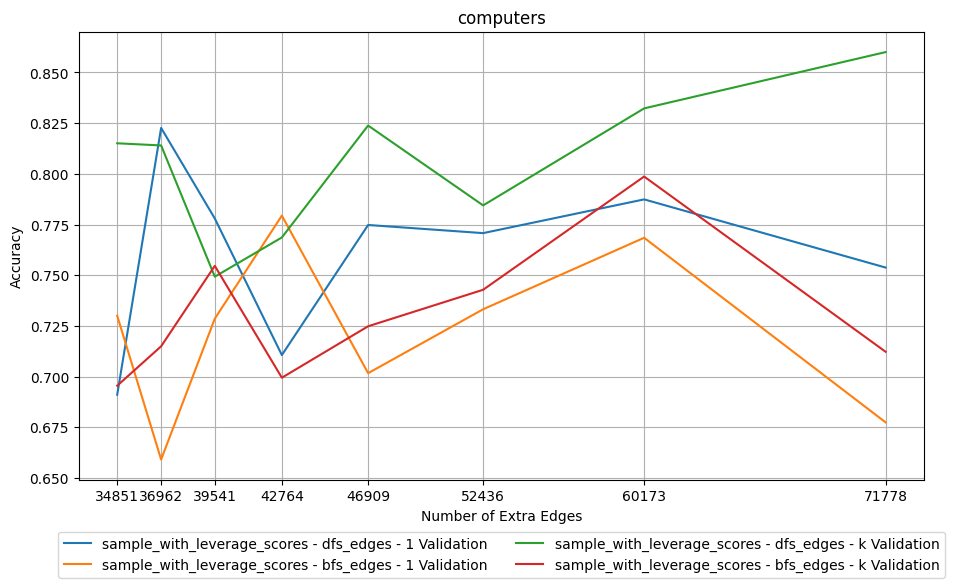

[2940 2964 2992 3028 3074 3135 3221 3349]


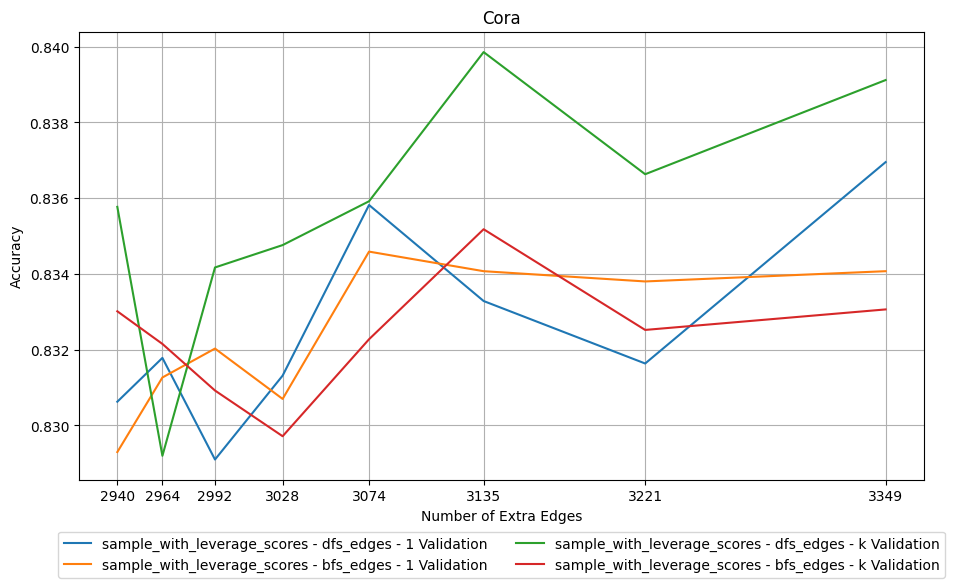

[3437 3448 3462 3479 3501 3530 3571 3632]


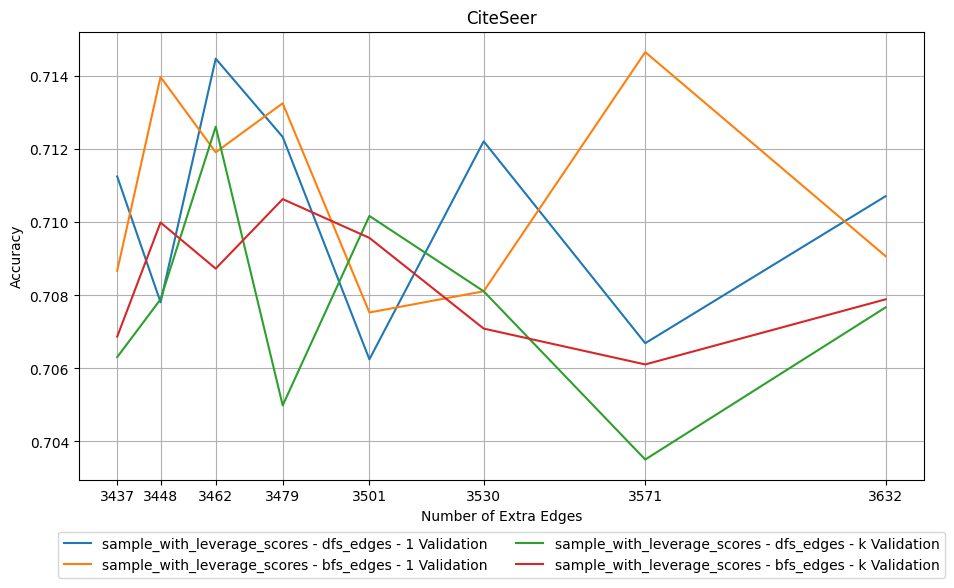

[14613 15077 15608 16220 16935 17779 18792 20030]


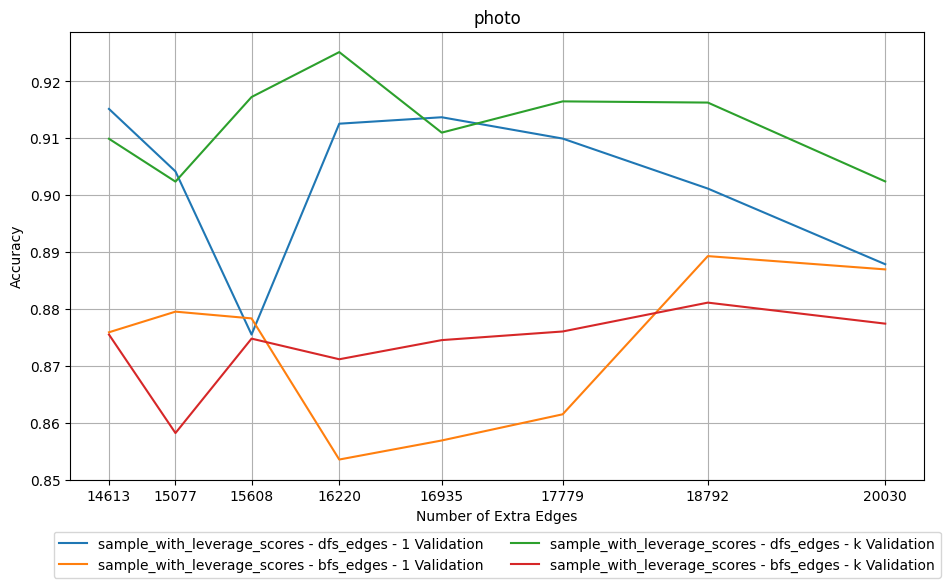

[21953 22176 22450 22792 23231 23817 24637 25868]


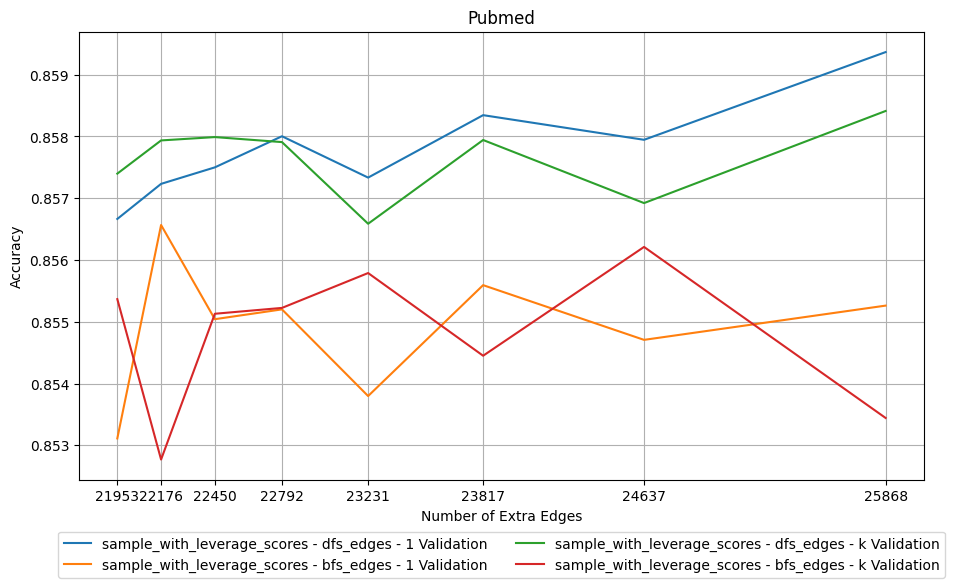

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define a function for a simple moving average
# default for the first value is the first value itself
def moving_average(data, window_size=3):
    smoothed_data = []
    
    # Handle the initial values with progressively larger averages
    for i in range(window_size - 1):
        smoothed_data.append(np.mean(data[:i + 1]))
    
    # Apply the regular moving average for the remaining values
    smoothed_data.extend(np.convolve(data, np.ones(window_size) / window_size, mode='valid'))
    
    return np.array(smoothed_data)



def plot_errorbars_from_csv(csv_file, m):
    # Load the data
    data = pd.read_csv(csv_file)
    
    plt.figure(figsize=(10, 6))

    # Get unique combinations of sampler and tree_function
    combinations = data[["sampler", "tree_func", "one_or_k"]].drop_duplicates()
    extra_edges = np.sort(data["nr_extra_edges"].unique())
    
    # only include certain combinations that contain leverage
    combinations = combinations[combinations["sampler"].str.contains("leverage")]

    # only consider first x extra edges
    extra_edges = extra_edges[:8]
    print(extra_edges)
    # Define a color map for the different combinations
    color_map = plt.get_cmap("tab10")
    colors = {index: color_map(i % 10) for i, index in enumerate(combinations.index)}

    # Iterate over each unique combination of sampler and tree_function
    for idx, (sampler, tree_function, algo) in combinations.iterrows():
        subset = data[(data["sampler"] == sampler) & (data["tree_func"] == tree_function) & (data["one_or_k"] == algo)]
        mean_val_acc = []
        std_val_acc = []
        for extra_edge in extra_edges:
            group = subset[subset["nr_extra_edges"] == extra_edge]
            
            # Calculate mean and std for validation accuracy
            mean_val_acc.append(group["val_acc"].median())
            std_val_acc.append(group["val_acc"].std())

        # Apply moving average smoothing to mean_val_acc
        smoothed_mean_val_acc = moving_average(mean_val_acc, window_size=2)
        # Adjust x-values for the shorter length due to the moving average
        smoothed_extra_edges = extra_edges[len(extra_edges) - len(smoothed_mean_val_acc):]

        # Plot the smoothed line
        label = f"{sampler[1:]} - {tree_function} - {algo} Validation"
        plt.plot(smoothed_extra_edges, smoothed_mean_val_acc, label=label, color=colors[idx])

    plt.title(csv_file.split("/")[-1].split("_")[0])
    plt.xlabel("Number of Extra Edges")
    plt.ylabel("Accuracy")
    plt.xticks(extra_edges)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()

m = 2
plot_errorbars_from_csv("output_csv/huge_run/computers_sparsifiers_results.csv", m=m)
plot_errorbars_from_csv("output_csv/huge_run/Cora_sparsifiers_results.csv", m=m)
plot_errorbars_from_csv("output_csv/huge_run/CiteSeer_sparsifiers_results.csv", m=m)
plot_errorbars_from_csv("output_csv/huge_run/photo_sparsifiers_results.csv", m=m)
plot_errorbars_from_csv("output_csv/huge_run/Pubmed_sparsifiers_results.csv", m=m)

